# Data Preparation

## Modules Import

Importing modules.

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import time
import copy
import gc

## Image Loading functions

In [2]:
def load_image(image_path:str):
    img = Image.open(image_path)
    img_arr = np.array(img)
    return img_arr

Testing the function.

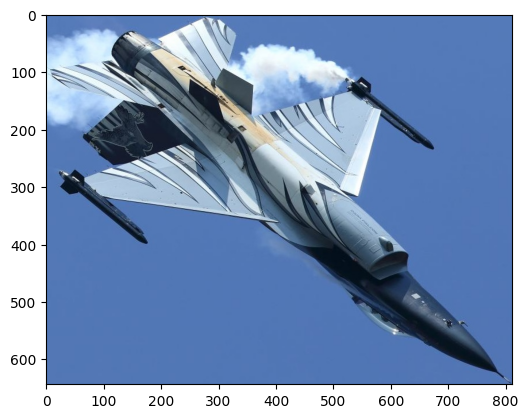

In [3]:
img_arr = load_image("images/training/F16/3e3c345c5417ac9e5a23ea282dd64570_0.jpg")
plt.imshow(img_arr)

Function to lower resolution of the image. It is needed to make computations faster.

In [4]:
num_px = 64
def load_lower_resolution(img):
    new_img = np.array(Image.open(img).resize((num_px, num_px)))
    return new_img

Testing the function.

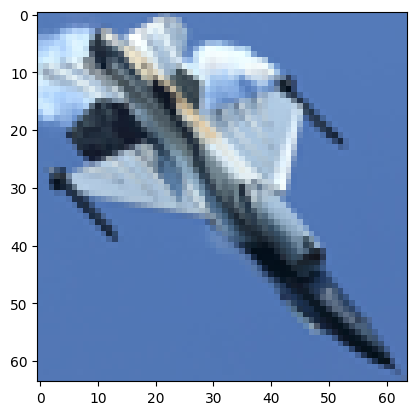

In [5]:
plt.imshow(load_lower_resolution("images/training/F16/3e3c345c5417ac9e5a23ea282dd64570_0.jpg"))

Define what planes to idenify.

In [95]:
class Planes:
    A10 = 'A10'
    B2 = 'B2'
    F16 = 'F16'
    Mig31 = 'Mig31'
    TB2 = 'TB2'
    Vulcan = 'Vulcan'
    Non_plane = 'Non_plane'

Function to load all images from given directory.

In [7]:
def load_images_from_directory(directory_path, lower_resolution=False):
    images = list()
    labels = list()

    for root, _, files in os.walk(directory_path):
        for filename in files:
            file_path = os.path.join(root, filename)

            # Determine the label based on the directory structure
            plane_folder = os.path.basename(root)
            if plane_folder == Planes.A10:
                label = Planes.A10
            elif plane_folder == Planes.B2:
                label = Planes.B2
            elif plane_folder == Planes.F16:
                label = Planes.F16
            elif plane_folder == Planes.Mig31:
                label = Planes.Mig31
            elif plane_folder == Planes.TB2:
                label = Planes.TB2
            elif plane_folder == Planes.Vulcan:
                label = Planes.Vulcan
            elif plane_folder == Planes.Non_plane:
                label = Planes.Non_plane
            else:
                continue  # Skip files in unrecognized folders
            
            if lower_resolution:
                images.append(load_lower_resolution(file_path))
            else:
                images.append(load_image(file_path))
            
            labels.append(label)
    
    return images, labels

Shuffle the images.

In [8]:
def shuffle_images_and_labels(images, labels):
    combined = list(zip(images, labels))
    random.shuffle(combined)
    shuffled_images, shuffled_labels = zip(*combined)
    return list(shuffled_images), list(shuffled_labels)

## Loading Data

Loading training data.

In [9]:
start_time = time.time()
train_set_x_orig_good_quality, train_set_y_good_quality = load_images_from_directory("images/training", False)
train_set_x_orig_good_quality, train_set_y_good_quality = shuffle_images_and_labels(train_set_x_orig_good_quality, train_set_y_good_quality)
train_set_x_orig, train_set_y = load_images_from_directory("images/training", True)
train_set_x_orig, train_set_y = shuffle_images_and_labels(train_set_x_orig, train_set_y)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time taken to load data: {elapsed_time:.2f} seconds")

Time taken to load data: 48.06 seconds


Convert training arrays that will actually be used to train the model into numpy arrays.

In [10]:
train_set_x_orig = np.array(train_set_x_orig)
train_set_y = np.array(train_set_y)

Testing the functions. The index can be changed.

It's F16


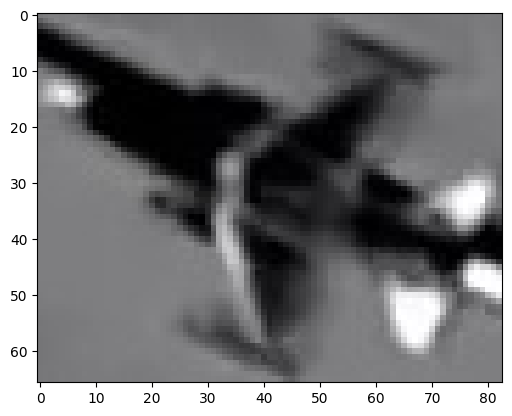

In [11]:
index = 206
plt.imshow(train_set_x_orig_good_quality[index])
print(f"It's {train_set_y_good_quality[index]}")

Testing the functions. All images must have the same dimensions. The index can be changed.

It's TB2


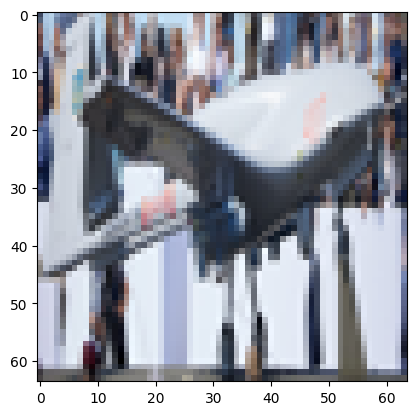

In [12]:
index = 42
plt.imshow(train_set_x_orig[index])
print(f"It's {train_set_y[index]}")

Loading test data.

In [13]:
start_time = time.time()
test_set_x_orig_good_quality, test_set_y_good_quality = load_images_from_directory("images/test", False)
test_set_x_orig_good_quality, test_set_y_good_quality = shuffle_images_and_labels(test_set_x_orig_good_quality, test_set_y_good_quality)
test_set_x_orig, test_set_y = load_images_from_directory("images/test", True)
test_set_x_orig, test_set_y = shuffle_images_and_labels(test_set_x_orig, test_set_y)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time taken to load data: {elapsed_time:.2f} seconds")

Time taken to load data: 2.52 seconds


Convert test arrays that will actually be used to train the model into numpy arrays.

In [14]:
test_set_x_orig = np.array(test_set_x_orig)
test_set_y = np.array(test_set_y)

Testing the functions. The index can be changed.

It's B2


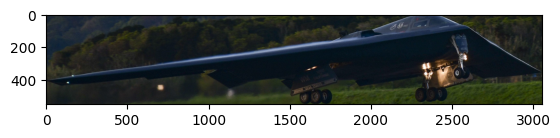

In [15]:
index = 61
plt.imshow(test_set_x_orig_good_quality[index])
print(f"It's {test_set_y_good_quality[index]}")

Testing the functions. All images must have the same dimensions. The index can be changed.

It's Vulcan


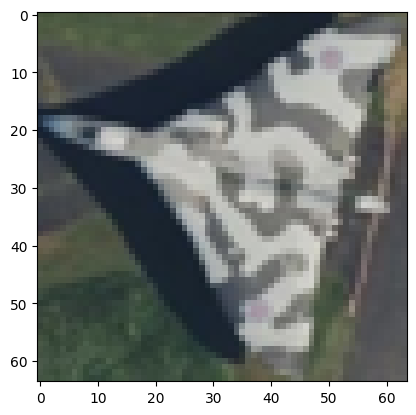

In [16]:
index = 38
plt.imshow(test_set_x_orig[index])
print(f"It's {test_set_y[index]}")

Delete data that will not be used and invoke the garbage collector.

In [17]:
del test_set_x_orig_good_quality, test_set_y_good_quality
gc.collect()
del train_set_x_orig_good_quality, train_set_y_good_quality
gc.collect()

0

Check/get dimensions.

In [18]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]

print(f"There are {m_train} images in the train_set_x_orig")
print(f"There are {m_test} images in the test_set_x_orig")
assert m_train == train_set_y.size
assert m_test == test_set_y.size
print(f"Each image is {num_px}x{num_px}px")

There are 3160 images in the train_set_x_orig
There are 144 images in the test_set_x_orig
Each image is 64x64px


Reshaping the images arrays (needed for further calculations).

In [19]:
train_set_x_flatten = train_set_x_orig.reshape(m_train,-1).T
test_set_x_flatten = test_set_x_orig.reshape(m_test,-1).T

To represent color images, the red, green and blue channels (RGB) must be specified for each pixel, and so the pixel value is actually a vector of three numbers ranging from 0 to 255.

One common preprocessing step in machine learning is to center and standardize your dataset, meaning that you substract the mean of the whole numpy array from each example, and then divide each example by the standard deviation of the whole numpy array. But for picture datasets, it is simpler and more convenient and works almost as well to just divide every row of the dataset by 255 (the maximum value of a pixel channel).

In [20]:
train_set_x = train_set_x_flatten / 255
test_set_x = test_set_x_flatten / 255

# Neural Network Image
The following Figure explains why **Deep learning is actually simple!**

<img src="images/explanation/deep_learning.png" style="width:650px;height:400px;">

# Neural Network Formulas

**Note**: This is just an example. The number of hidden layers, activation functions, and other parameters can be changed.

## Forward Propagation

### Layer 1 (Input to Hidden Layer)
- **Z1** (Weighted input to hidden layer):
  $$
  Z1 = X \cdot W1 + b1
  $$
  - $X$: Input data matrix (m examples, n features)
  - $W1$: Weight matrix for layer 1 (n features, h hidden units)
  - $b1$: Bias vector for layer 1 (1, h hidden units)

- **A1** (Activation of hidden layer using $\tanh$):
  $$
  A1 = \tanh(Z1)
  $$
  - $\tanh(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}$

### Layer 2 (Hidden to Output Layer)
- **Z2** (Weighted input to output layer):
  $$
  Z2 = A1 \cdot W2 + b2
  $$
  - $W2$: Weight matrix for layer 2 (h hidden units, o output units)
  - $b2$: Bias vector for layer 2 (1, o output units)

- **A2** (Activation of output layer using Softmax):
  $$
  A2 = \text{Softmax}(Z2)
  $$
  - $\text{Softmax}(z_i) = \frac{e^{z_i}}{\sum_{j} e^{z_j}}$

## Loss Function

### Cross-Entropy Loss
$$
\text{Loss} = -\frac{1}{m} \sum_{i=1}^m \sum_{k=1}^o y_{i,k} \log(A2_{i,k})
$$
- $y$: True labels (one-hot encoded)
- $A2$: Predicted probabilities from softmax
- $m$: Number of examples
- $o$: Number of output units (classes)

## Backward Propagation

### Output Layer (Layer 2)
- **dZ2** (Gradient of loss with respect to Z2):
  $$
  dZ2 = A2 - Y
  $$

- **dW2** (Gradient of loss with respect to W2):
  $$
  dW2 = \frac{1}{m} A1^T \cdot dZ2
  $$

- **db2** (Gradient of loss with respect to b2):
  $$
  db2 = \frac{1}{m} \sum_{i=1}^m dZ2_i
  $$

### Hidden Layer (Layer 1)
- **dA1** (Gradient of loss with respect to A1):
  $$
  dA1 = dZ2 \cdot W2^T
  $$

- **dZ1** (Gradient of loss with respect to Z1):
  $$
  dZ1 = dA1 \cdot \tanh'(Z1)
  $$
  - $\tanh'(z)$ is the derivative of the $\tanh$ function:
    $$
    \tanh'(z) = 1 - \tanh^2(z)
    $$

- **dW1** (Gradient of loss with respect to W1):
  $$
  dW1 = \frac{1}{m} X^T \cdot dZ1
  $$

- **db1** (Gradient of loss with respect to b1):
  $$
  db1 = \frac{1}{m} \sum_{i=1}^m dZ1_i
  $$

## Parameter Update
- Update rules for the weights and biases using gradient descent:
  $$
  W1 := W1 - \alpha \cdot dW1
  $$
  $$
  b1 := b1 - \alpha \cdot db1
  $$
  $$
  W2 := W2 - \alpha \cdot dW2
  $$
  $$
  b2 := b2 - \alpha \cdot db2
  $$
  - $\alpha$: Learning rate


# Choosing Hidden Layer Function

This code shows 4 functions.

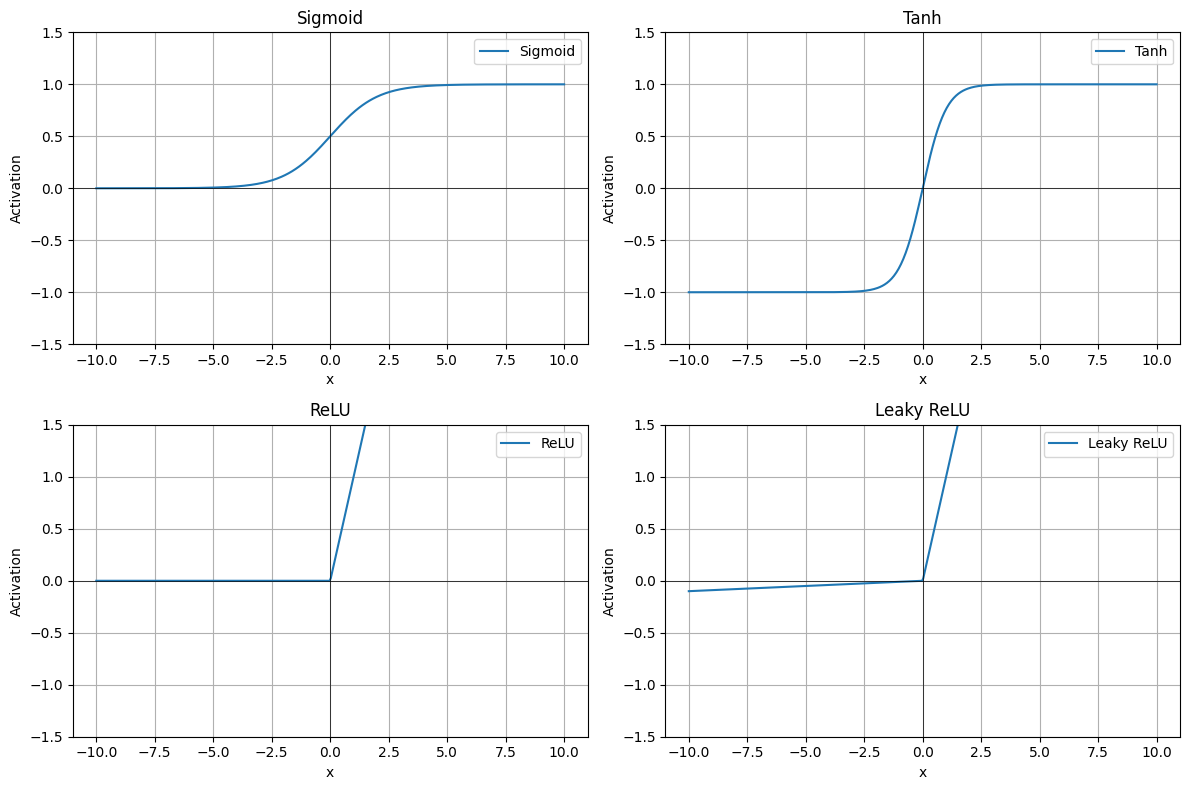

In [21]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

x = np.linspace(-10, 10, 400)

activation_functions = {
    'Sigmoid': sigmoid,
    'Tanh': tanh,
    'ReLU': relu,
    'Leaky ReLU': leaky_relu
}

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes = axes.flatten()

for ax, (name, func) in zip(axes, activation_functions.items()):
    ax.plot(x, func(x), label=name)
    ax.set_title(name)
    ax.set_xlabel('x')
    ax.set_ylabel('Activation')
    ax.legend()
    ax.grid(True)
    ax.set_ylim([-1.5, 1.5])
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)

plt.tight_layout()
plt.show()

For this NN the tanh function was chosen. The function can be changed in the code.

# Support functions

The following functions must be implemented.
```python
def initialize_parameters(layer_dims):
    ...
    return parameters 
def linear_forward(A, W, b):
    ...
    return A, cache
def softmax(Z):
    ...
    return np.exp(Z) / np.sum(np.exp(Z), axis = 0)
def linear_activation_forward(A_prev, W, b, activation):
    ...
    return A, cache
def L_model_forward(X, parameters):
    ...
    return AL, caches
def one_hot_encoding(Y, class_to_index):
    ...
    return Y_one_hot
def compute_cost(X, y):
    ...
    return cost
def linear_backward(dZ, cache):
    ...
    return dA_prev, dW, db
def linear_activation_backward(dA, cache, activation):
    ...
    return dA_prev, dW, db
def tanh_backward(dA, activation_cache):
    ...
    return dZ
def softmax_backward(dA, activation_cache):
    ...
    return dZ
def L_model_backward(AL, Y, caches):
    ...
    return grads
def update_parameters(parameters, grads, learning_rate):
    ...
    return parameters
def predict(X, Y, parameters):
    ...
    return predictions
```

## Initialize Parameters

**Input Matrix \(X\)**:
$$ X \text{: Input data matrix of shape } (m, n_x) $$

**Weight Matrix \(W1\)**:
$$ W1 \text{: Weight matrix of shape } (n_h, n_x) $$

**Linear Combination Result \(Z1\)**:
$$ Z1 \text{: Linear combination result of shape } (m, n_h) $$

**Bias Vector \(b1\)**:
$$ b1 \text{: Bias vector of shape } (n_h, 1) $$

**Forward Propagation Formula**:
$$ Z1 = X \cdot W1^T + b1 $$


In [78]:
def initialize_parameters(layer_dims):
    np.random.seed(1)
    parameters = {}
    L = len(layer_dims)
    for l in range(1,L):
      parameters[f"W{l}"] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.01
      parameters[f"b{l}"] = np.zeros((layer_dims[l], 1))
        
      assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l - 1]))
      assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))
    return parameters
    

## Linear Forward

**Formula**:
$$ Z = W \cdot A + b $$

1. **Input Data \( A \)**
$$   - Shape:  (n_{\text{prev}}, m)  $$

2. **Weights Matrix \( W \)**
$$   - Shape:  (n_{\text{curr}}, n_{\text{prev}})  $$

3. **Bias Vector \( b \)**
$$   - Shape:  (n_{\text{curr}}, 1)  $$

In [89]:
def linear_forward(A, W, b):
    Z = np.dot(W, A) + b
    cache = (A, W, b)
    return Z, cache

## Linear Activation Forward

### Softmax Function

The softmax function is commonly used in machine learning, especially in the context of neural networks for classification problems. It converts a vector of values into a probability distribution.

The formula for the softmax function for a vector $ \mathbf{z} $ of length $ K $ is given by:

$$ \sigma(\mathbf{z})_i = \frac{e^{z_i}}{\sum_{j=1}^K e^{z_j}} $$

where:
- $ \sigma(\mathbf{z})_i $ is the \( i \)-th component of the output vector after applying softmax.
- $ z_i $ is the $ i $-th component of the input vector $ \mathbf{z} $.
- $ K $ is the number of elements in the input vector $ \mathbf{z} $.
- $ e $ is the base of the natural logarithm.

This formula ensures that the sum of the output probabilities is 1, making it a valid probability distribution.
<div style="text-align: center; margin-top: 20px; margin-bottom: 20px;">
    <img src="images/explanation/softmax.jpg" style="width:650px;height:400px;">
</div>

In [91]:
def softmax(Z):
    e_Z = np.exp(Z - np.max(Z, axis=0, keepdims=True))  # Numerical stability
    A = e_Z / np.sum(e_Z, axis=0, keepdims=True)
    return A

## Implementation
For even *more* convenience when implementing the $L$-layer Neural Net, there is a need for a function that replicates the previous one (`linear_activation_forward` with **tanh**) $L-1$ times, then follows that with one `linear_activation_forward` with **softmax**.
<div style="text-align: center; margin-top: 20px; margin-bottom: 20px;">
    <img src="images/explanation/2_layer_nn.png" style="width:650px;height:400px;">
</div>

In [85]:
def linear_activation_forward(A_prev, W, b, activation):
    Z, linear_cache = linear_forward(A_prev, W, b)
    
    if activation == "tanh":
        A = np.tanh(Z)
    elif activation == "softmax":
        A = softmax(Z)
    
    cache = (linear_cache, Z)
    return A, cache

## L Model Forward
Same principle can be applied to N-layer Neural Network.
<div style="text-align: center; margin-top: 20px; margin-bottom: 20px;">
    <img src="images/explanation/n_layer_nn.png" style="width:650px;height:400px;">
</div>

In [88]:
def L_model_forward(X, parameters):
    caches = []
    A = X
    L = len(parameters) // 2 # number of layers in the neural network
    for l in range(1, L):
        A_prev = A
        A, cache = linear_activation_forward(A_prev, parameters[f"W{l}"], parameters[f"b{l}"], activation = "tanh")
        caches.append(cache)
    AL, cache = linear_activation_forward(A, parameters[f"W{L}"], parameters[f"b{L}"], activation = "softmax")
    caches.append(cache)
    return AL, caches

## Cost Function

### Softmax Function

The softmax function is commonly used in machine learning, especially in the context of neural networks for classification problems. It converts a vector of values into a probability distribution.

The formula for the softmax function for a vector $ \mathbf{z} $ of length $ K $ is given by:

$$ \sigma(\mathbf{z})_i = \frac{e^{z_i}}{\sum_{j=1}^K e^{z_j}} $$

where:
- $ \sigma(\mathbf{z})_i $ is the $ i $-th component of the output vector after applying softmax.
- $ z_i $ is the $ i $-th component of the input vector $ \mathbf{z} $.
- $ K $ is the number of elements in the input vector $ \mathbf{z} $.
- $ e $ is the base of the natural logarithm.

### Cross-Entropy Loss for Softmax

When using the softmax activation function in the output layer of a neural network, the cross-entropy loss is used to measure the performance. The cross-entropy loss $ \mathcal{L} $ is computed as:

$$ \mathcal{L} = -\frac{1}{m} \sum_{i=1}^{m} \sum_{j=1}^{C} y_j^{(i)} \log(\hat{y}_j^{(i)}) $$

where:
- $ m $ is the number of examples.
- $ C $ is the number of classes.
- $ y_j^{(i)} $ is the $ j $-th element of the true label vector for the $ i $-th example (1 if the true class is $ j $, 0 otherwise).
- $ \hat{y}_j^{(i)} $ is the $ j $-th element of the predicted probability vector for the $ i $-th example, output by the softmax function.


### Implementation

In [97]:
classes = [Planes.A10, Planes.B2, Planes.F16, Planes.Mig31, Planes.TB2, Planes.Vulcan, Planes.Non_plane]
class_to_index = {class_name: index for index, class_name in enumerate(classes)}
def one_hot_encoding(Y, class_to_index):
    """
    Converts a class vector (strings) into one-hot encoding.

    Arguments:
    Y -- class vector of shape (number of examples, ) with class names
    class_to_index -- dictionary mapping class names to indices

    Returns:
    Y_one_hot -- one-hot encoded matrix of shape (number of classes, number of examples)
    """
    m = Y.shape[0]  # number of examples
    C = len(class_to_index)  # number of classes
    Y_one_hot = np.zeros((C, m))

    for i in range(m):
        class_index = class_to_index[Y[i]]
        Y_one_hot[class_index, i] = 1

    return Y_one_hot
def compute_cost(AL, Y):
    """
    Implement the cost function for a softmax output layer using cross-entropy loss.
    
    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (C, number of examples)
    Y -- true "label" vector (one-hot encoded), shape (C, number of examples)
    
    Returns:
    cost -- cross-entropy cost
    """
    m = Y.shape[1]  
    cost = -np.sum(Y * np.log(AL + 1e-8)) / m  
    return cost

## Backward Propagation

Backpropagation is used to calculate the gradient of the loss function with respect to the parameters. 
<div style="text-align: center; margin-top: 20px; margin-bottom: 20px;">
    <img src="images/explanation/assigment_structure.png">
</div>

For the next part, we will need to remember that:

- `b` is a matrix(np.ndarray) with 1 column and n rows, i.e: b = [[1.0], [2.0]] (remember that `b` is a constant)
- np.sum performs a sum over the elements of a ndarray
- axis=1 or axis=0 specify if the sum is carried out by rows or by columns respectively
- keepdims specifies if the original dimensions of the matrix must be kept.
- Look at the following example to clarify:

In [45]:
A = np.array([[1, 2], [3, 4]])

print('axis=1 and keepdims=True')
print(np.sum(A, axis=1, keepdims=True))
print('axis=1 and keepdims=False')
print(np.sum(A, axis=1, keepdims=False))
print('axis=0 and keepdims=True')
print(np.sum(A, axis=0, keepdims=True))
print('axis=0 and keepdims=False')
print(np.sum(A, axis=0, keepdims=False))

axis=1 and keepdims=True
[[3]
 [7]]
axis=1 and keepdims=False
[3 7]
axis=0 and keepdims=True
[[4 6]]
axis=0 and keepdims=False
[4 6]


### Linear Backward

For layer $l$, the linear part is: $Z^{[l]} = W^{[l]} A^{[l-1]} + b^{[l]}$ (followed by an activation).

Suppose we have already calculated the derivative $dZ^{[l]} = \frac{\partial \mathcal{L} }{\partial Z^{[l]}}$. We want to get $(dW^{[l]}, db^{[l]}, dA^{[l-1]})$.

<div style="text-align: center; margin-top: 20px; margin-bottom: 20px;">
    <img src="images/explanation/linearback_kiank.png">
</div>

The three outputs $(dW^{[l]}, db^{[l]}, dA^{[l-1]})$ are computed using the input $dZ^{[l]}$.

Here are the formulas we need:
$$ dW^{[l]} = \frac{\partial \mathcal{J} }{\partial W^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T} \tag{8}$$
$$ db^{[l]} = \frac{\partial \mathcal{J} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)}\tag{9}$$
$$ dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = W^{[l] T} dZ^{[l]} \tag{10}$$


$A^{[l-1] T}$ is the transpose of $A^{[l-1]}$. 

In [47]:
def linear_backward(dZ, cache):
    """
    Implementation of the the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]
    dW = 1/m * np.dot(dZ, A_prev.T)
    db = 1/m * np.sum(dZ, axis = 1, keepdims = True)
    dA_prev = np.dot(W.T, dZ)
    return dA_prev, dW, db

### Backpropagation Formulas

#### Tanh Backward Propagation
Given:
$ Z = \text{activation\_cache} $
$ A = \tanh(Z) $

Gradient:
$ dZ = dA \cdot (1 - A^2) $

#### Softmax Backward Propagation
Given:
$ Z = \text{activation\_cache} $
$ \text{exp\_scores} = e^Z $
$ A = \frac{\text{exp\_scores}}{\sum \text{exp\_scores}} $

Gradient:
$ dZ = dA \cdot A \cdot (1 - A) $


### Implementation

In [56]:
def tanh_backward(dA, activation_cache):
    """
    Implement the backward propagation for a single tanh unit.

    Arguments:
    dA -- post-activation gradient for current layer l 
    activation_cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z (current layer l)
    """
    Z = activation_cache
    A = np.tanh(Z)
    dZ = dA * (1 - np.power(A, 2))
    return dZ

In [55]:
def softmax_backward(dA, activation_cache):
    """
    Implement the backward propagation for the softmax function.

    Arguments:
    dA -- Gradient of the cost with respect to the output of the softmax layer
    activation_cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to the linear output (Z) of the softmax layer
    """
    Z = activation_cache
    exp_scores = np.exp(Z)
    A = exp_scores / np.sum(exp_scores, axis=0, keepdims=True)  # Softmax activation
    dZ = dA * A * (1 - A)  # Simplified for softmax + cross-entropy
    return dZ

Implementtion of the backpropagation for the *LINEAR->ACTIVATION* layer.

In [53]:
def linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.

    Arguments:
    dA -- post-activation gradient for current layer l 
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "tanh" or "softmax"
    
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache
    
    if activation == "tanh":
        dZ = tanh_backward(dA, activation_cache)
    elif activation == "softmax":
        dZ = softmax_backward(dA, activation_cache)
    
    dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db

## L-layer Model Backward

In [87]:
def L_model_backward(AL, Y, caches):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SOFTMAX group
    
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (one-hot encoded for multi-class classification)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
                the cache of linear_activation_forward() with "softmax" (it's caches[L-1])
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(caches) 
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)  

    dAL = AL - Y  

    current_cache = caches[L-1]
    dA_prev_temp, dW_temp, db_temp = linear_activation_backward(dAL, current_cache, activation="softmax")
    grads[f"dA{L-1}"] = dA_prev_temp
    grads[f"dW{L}"] = dW_temp
    grads[f"db{L}"] = db_temp

    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads[f"dA{l+1}"], current_cache, activation="tanh")
        grads[f"dA{l}"] = dA_prev_temp
        grads[f"dW{l+1}"] = dW_temp
        grads[f"db{l+1}"] = db_temp

    return grads

## Update parameters

Given:
- Learning rate: $ \alpha $
- Current parameters: $ W $ and $ b $
- Gradients: $ dW $ and $ db $

Update rules:
$$ W := W - \alpha \cdot dW $$
$$ b := b - \alpha \cdot db $$
Updating parameters using gradient descent on every $W^{[l]}$ and $b^{[l]}$ for $l = 1, 2, ..., L$. 

In [59]:
def update_parameters(params, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    params -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters[f"W{l+1}"] = ... 
                  parameters[f"b{l+1}"] = ...
    """
    parameters = copy.deepcopy(params)
    L = len(parameters) // 2 # number of layers in the neural network

    for l in range(L):
        parameters[f"W{l+1}"] = params[f"W{l+1}"] - learning_rate * grads[f"dW{l+1}"]
        parameters[f"b{l+1}"] = params[f"b{l+1}"] - learning_rate * grads[f"db{l+1}"]
    return parameters

## Predict

In [107]:
def predict(X, Y, parameters):
    """
    Predict the results of a L-layer neural network.

    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector, of shape (number of classes, number of examples)
    parameters -- python dictionary containing the parameters "W" and "b"

    Returns:
    predictions -- vector of predictions (0/1) for the examples in X
    """
    AL, _ = L_model_forward(X, parameters)
    
    predictions = np.argmax(AL, axis=0) # Get index of max value in each column
    
    return predictions

# L-layer Deep Neural Network

Time to use the helper functions we implemented previously to build an $L$-layer neural network with the following structure: *[LINEAR -> tanh]$\times$(L-1) -> LINEAR -> softmax*. The functions and their inputs are:
```python
def initialize_parameters(layers_dims):
    ...
    return parameters 
def L_model_forward(X, parameters):
    ...
    return AL, caches
def cross_entropy(X, Y):
    ...
    return cost
def L_model_backward(AL, Y, caches):
    ...
    return grads
def update_parameters(parameters, grads, learning_rate):
    ...
    return parameters
def one_hot_encoding(Y, class_to_index):
    ...
    return Y_one_hot
```

In [137]:
### CONSTANTS ###
layers_dims = [12288, 30, 15, 10, 7, 5, 7] # 6 layer model

In [138]:
def L_layer_model(X, Y, layers_dims, learning_rate=0.01, num_iterations=3000, print_cost=False):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SOFTMAX.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (one-hot encoded for multi-class classification), of shape (C, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(2)
    costs = []                         
    
    parameters = initialize_parameters(layers_dims)
    
    for i in range(num_iterations):
        AL, caches = L_model_forward(X, parameters)
        
        cost = compute_cost(AL, Y)
        
        grads = L_model_backward(AL, Y, caches)
        
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if print_cost and (i % 100 == 0 or i == num_iterations - 1):
            print(f"Cost after iteration {i}: {np.squeeze(cost)}")
        if i % 100 == 0 or i == num_iterations - 1:
            costs.append(cost)
    
    return parameters, costs

Time to train the model.

In [139]:
Y_one_hot = one_hot_encoding(train_set_y, class_to_index)
parameters, costs = L_layer_model(train_set_x, Y_one_hot, layers_dims, num_iterations=2500, print_cost=True)

Cost after iteration 0: 1.945910079183402
Cost after iteration 100: 1.9451920496441317
Cost after iteration 200: 1.9444976932386988
Cost after iteration 300: 1.9438263258847235
Cost after iteration 400: 1.9431772803289427
Cost after iteration 500: 1.9425499056290576
Cost after iteration 600: 1.9419435666743006
Cost after iteration 700: 1.9413576437415587
Cost after iteration 800: 1.9407915320840374
Cost after iteration 900: 1.94024464154962
Cost after iteration 1000: 1.9397163962261994
Cost after iteration 1100: 1.939206234111441
Cost after iteration 1200: 1.938713606804555
Cost after iteration 1300: 1.938237979217824
Cost after iteration 1400: 1.9377788293057643
Cost after iteration 1500: 1.9373356478099428
Cost after iteration 1600: 1.9369079380176177
Cost after iteration 1700: 1.9364952155324893
Cost after iteration 1800: 1.9360970080560023
Cost after iteration 1900: 1.9357128551777494
Cost after iteration 2000: 1.935342308173658
Cost after iteration 2100: 1.9349849298107635
Cost af

# Testing

Testing on train and test data.

In [140]:
pred_train = predict(train_set_x, Y_one_hot, parameters)

In [141]:
pred_test = predict(test_set_x, Y_one_hot, parameters)

Getting the accuracy.

In [142]:
true_labels = np.argmax(Y_one_hot, axis=0)

accuracy = np.mean(pred_train == true_labels)
print(f"Prediction accuracy: {accuracy:.4f}")

Prediction accuracy: 0.1972


In [143]:
true_labels = np.argmax(one_hot_encoding(test_set_y, class_to_index), axis=0)

accuracy = np.mean(pred_test == true_labels)
print(f"Prediction accuracy: {accuracy:.4f}")

Prediction accuracy: 0.1667


# Test With Your Own Image

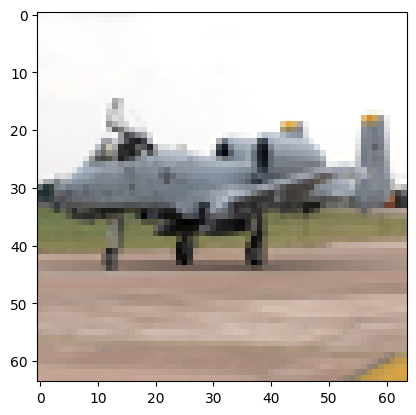

y = 0, L-layer model predicts a "A10" picture.


In [146]:
def try_predict(X, parameters):
    AL, _ = L_model_forward(X, parameters)
    predictions = np.argmax(AL, axis=0)
    #print("Softmax output probabilities:", AL)
    return predictions

num_px = 64
classes = np.array(["A10", "B2", "F16", "Mig31", "TB2", "Vulcan", "Non_plane"])

my_image = "A10.jpg"  # Change this to the name of your image file
fname = "images/user_test/" + my_image
image = np.array(Image.open(fname).resize((num_px, num_px)))
plt.imshow(image)
plt.show()

image = image.astype(float)
image /= 255.
image = image.reshape((1, num_px * num_px * 3)).T

my_label_y = np.array([])

my_predicted_image = try_predict(image, parameters)

print(f"y = {np.squeeze(my_predicted_image)}, L-layer model predicts a \"{classes[int(np.squeeze(my_predicted_image))]}\" picture.")